# correlation matrix

In [1]:
# This program creates a correlation matrix from data stored in a csv file.
# It then saves the correlation matrix as a csv file.

# The data file must be in columns of numbers - no column labels, etc.
# Each column is a data series, X0, X1, X2, etc.

# This data must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file demo_multreg_data_example.csv for reference.

# In the next line, replace demo_multreg_data_example.csv with the filename of your data:
data_filename = 'demo_multreg_data_example.csv'

# In the next line, replace correlation_matrix with the filename you wish to save as:
output_filename = 'correlation_matrix.csv'

# The next lines import the necessary package to create the correlation analysis:
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines create the correlation matrix and print it:
correlation_matrix = np.corrcoef(data.T)
print(correlation_matrix)

# correlation_matrix[i,j] is the correlation between the series Xi and Xj.

# The next line saves the correlation matrix as a csv file:
np.savetxt(output_filename,correlation_matrix,delimiter=',')

[[1.         0.72960693 0.97846909]
 [0.72960693 1.         0.60106642]
 [0.97846909 0.60106642 1.        ]]


# histogram

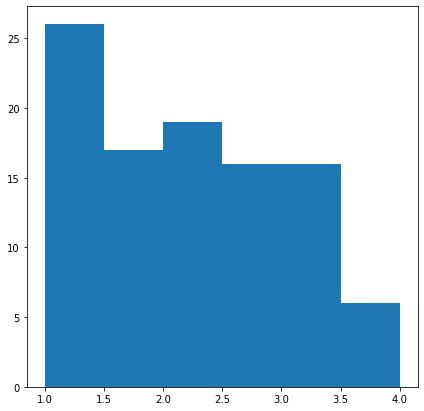

In [3]:
# This program creates a histogram from data stored in a csv file and saves it as a png image.

# The data file must be one column of numbers - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file sample_histogram_data.csv for reference.

# In the next line, replace sample_histogram_data.csv with the filename of your data:
data_filename = 'sample_histogram_data.csv'

# In the next line, replace histogram with the filename you wish to save as:
output_filename = 'histogram.png'

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# These two lines import modules of additional python functions that will be necessary:
import matplotlib.pyplot as plt
import numpy as np

# This line imports the data:
data = np.genfromtxt(data_filename)

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next four lines to set the axis limits (otherwise they will be set automatically):
# x_axis_min, x_axis_max = 0.95,4.05
# y_axis_min, y_axis_max = 4.05
# plt.xlim([x_axis_min,x_axis_max])
# plt.ylim([y_axis_min,y_axis_max])

# This next parameter controls how the data is binned.
# Either set it as a particular value (e.g. bin_info = 6)...
# ... for Python to create a number of evenly spaced bins (from the min to the max data points)...
# Or set a list of bin endpoints (e.g. bin_info = [1.0,1.5,2.0,2.5,3.0,3.5,4.0])...
# Or set bin_info = None for Python to set the bins however it thinks best.
bin_info = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]

# The next lines create and save the plot:
plt.hist(data,bins=bin_info)
plt.savefig(output_filename)

# multiple linear regression

In [4]:
# This program performs a multiple linear regression from data stored in a csv file.

# The data file must be in columns of numbers - no column labels, etc.
# The first column is the y values, the following columns are the predictors x1, x2, x3, etc.

# This data must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file demo_multreg_data_example.csv for reference.

# In the next line, replace demo_multreg_data_example.csv with the filename of your data:
data_filename = 'demo_multreg_data_example.csv'

# The next lines import the necessary packages to perform the regression:
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines extract the y-values and the x-values from the data:
y_values = data[:,0]
x_values = data[:,1:]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4259.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           3.14e-95
Time:                        22:45:13   Log-Likelihood:                -471.79
No. Observations:                 100   AIC:                             949.6
Df Residuals:                      97   BIC:                             957.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.7401      5.917     33.248      0.0

# linear regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.252e+05
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:45:16   Log-Likelihood:                -3100.8
No. Observations:                 282   AIC:                             6206.
Df Residuals:                     280   BIC:                             6213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4267.8402    972.392     -4.389      0.0

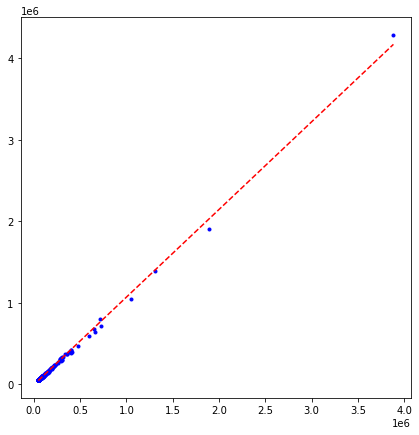

In [5]:
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename = 'population_regression_data.csv'

# In the next line, replace boxplot with the filename you wish to save as:
output_filename = 'regression_figure.png'

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# These lines extract the y-values and the x-values from the data:
x_values = data[:,0]
y_values = data[:,1]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig(output_filename)